In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
import pandas as pd
import numpy as np

cols = ['advertiser_id','source_id','created','latitude','longitude','carrier_id',
        'trans_id','os_minor','agent_device','os_major','specs_brand','brand','timeToClick','touchX',
        'touchY','ref_type','ref_hash']

dtypes = {'advertiser_id':'category','source_id':'category','latitude':'float32','longitude':'float32','carrier_id':'float32',
          'brand':'category','timeToClick':'float32'}

clicks = pd.read_csv(r'C:\Users\Matias\Documents\UBA\Datos\clicks.csv.gzip',usecols = cols,dtype = dtypes,compression = 'gzip')


In [4]:
#find % spread of OS version, having auto update on or having a new phone might show a tendency towards apps with ads?
#action id is all null
#country code is all the same 6333597102633388268
#wifi_connection is all false
# agent_device and brand is not all null

clicks.head()


,advertiser_id,source_id,created,latitude,longitude,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,4,2019-03-06T22:42:12.755Z,1.205689,1.070234,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563000,0.905,0.078,1891515180541284343,1904083516767779093
1,0,0,2019-03-08T10:24:30.641Z,1.218924,1.071209,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,0,2019-03-08T15:24:16.069Z,1.205689,1.070234,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,3,2019-03-06T03:08:51.543Z,1.205689,1.070234,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013000,0.035,0.431,1891515180541284343,4368617728156436525
4,2,3,2019-03-06T03:32:55.570Z,1.205689,1.070234,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110001,0.054,0.423,1891515180541284343,4368617728156436525


In [5]:
clicks['created'] = pd.to_datetime(clicks['created'])
clicks['hour'] = clicks['created'].apply(lambda x: x.hour)
clicks['hour'] = clicks['hour'].astype('int8')

clicks['day'] = clicks['created'].apply(lambda x: x.day)
clicks['day'] = clicks['day'].astype('int8')

clicks['clicks_value'] = 1

Text(0, 0.5, 'clicks')

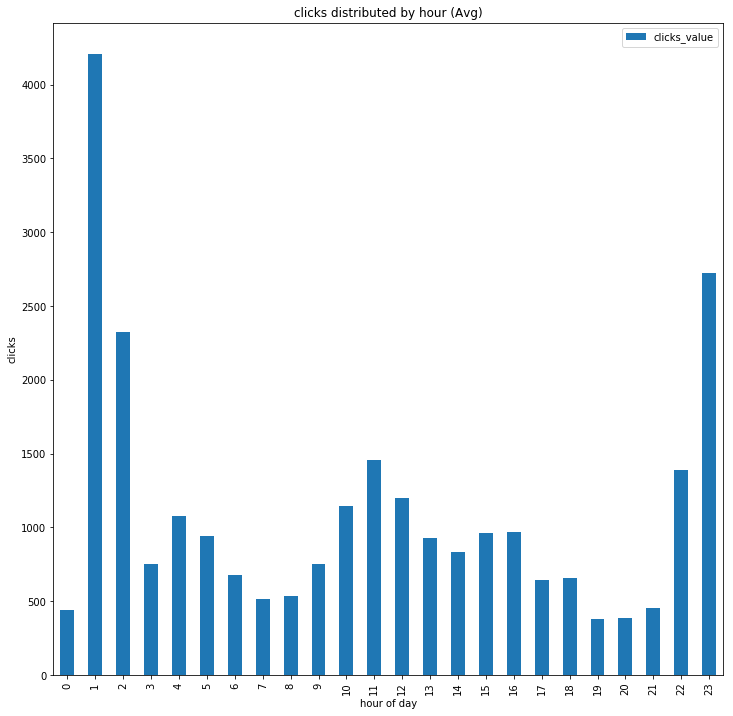

In [6]:
#probably not good, see heatmap
ax = clicks.groupby('hour').agg({'clicks_value':'sum'}).plot.bar(title = 'clicks distributed by hour (Avg)',figsize = [12,12])
ax.set_xlabel("hour of day")
ax.set_ylabel("clicks")

Text(0, 0.5, 'clicks')

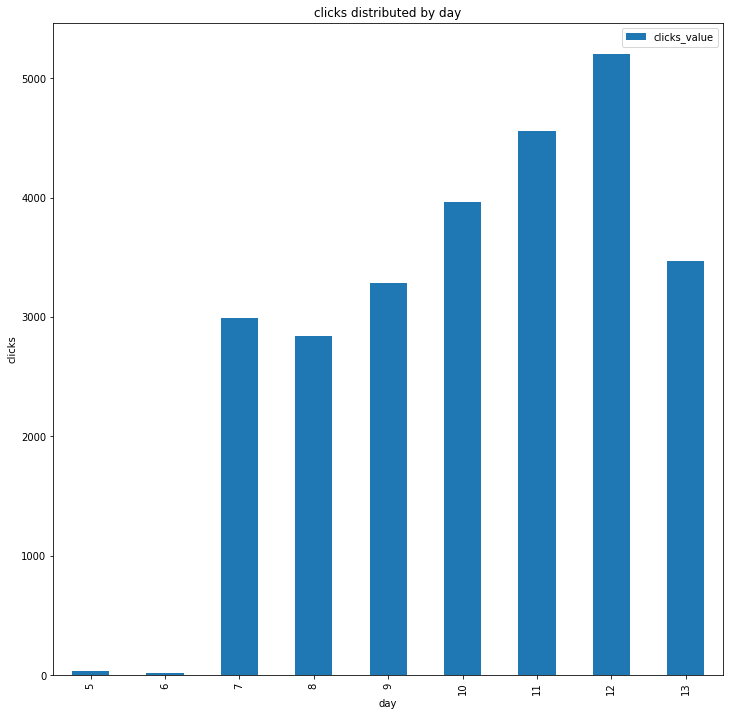

In [7]:
ax = clicks.groupby('day').agg({'clicks_value':'sum'}).plot.bar(title = 'clicks distributed by day',figsize = [12,12])
ax.set_xlabel("day")
ax.set_ylabel("clicks")
#ax = clicks.loc[clicks['day'] == 7]

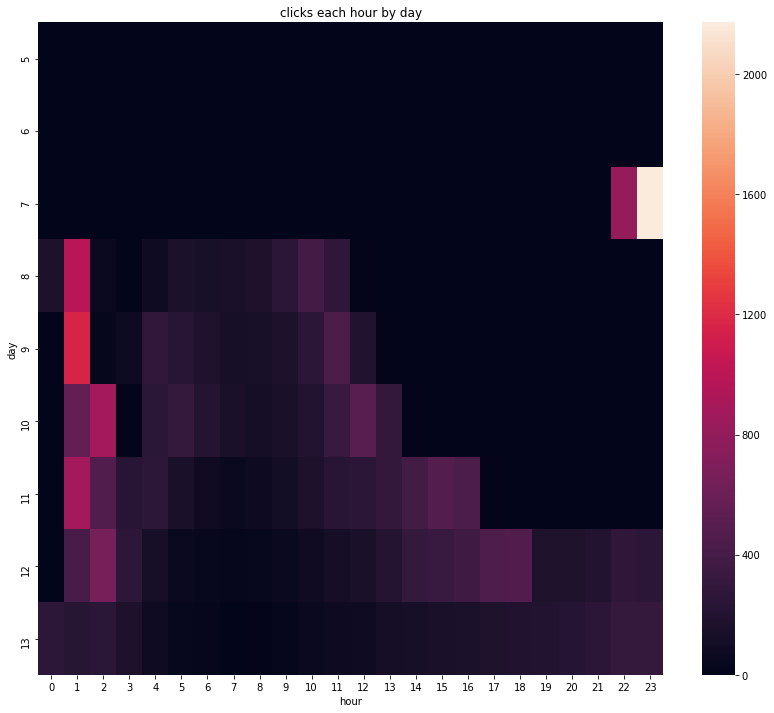

In [8]:
byHoursDays = clicks.groupby(['day','hour']).agg({'clicks_value':'sum'}).unstack()
byHoursDays.columns = byHoursDays.columns.get_level_values(1)
byHoursDays.fillna(0, inplace=True)
fig, ax = plt.subplots(figsize=(14,12)) 
ax.set_title('clicks each hour by day')
sns.heatmap(byHoursDays,ax = ax)

In [9]:
byHoursDays.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
5,0.0,2.0,7.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,...,0.0,3.0,2.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0
6,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,3.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,1.0,0.0,0.0,1.0,808.0,2172.0
8,166.0,988.0,57.0,13.0,84.0,154.0,143.0,147.0,162.0,252.0,...,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9,16.0,1154.0,28.0,71.0,284.0,236.0,173.0,128.0,138.0,162.0,...,5.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


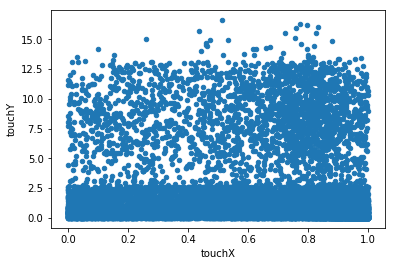

In [10]:
clicks.plot.scatter(x = 'touchX', y ='touchY')

In [11]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 20 columns):
advertiser_id    26351 non-null category
source_id        26351 non-null category
created          26351 non-null datetime64[ns]
latitude         26351 non-null float32
longitude        26351 non-null float32
carrier_id       26340 non-null float32
trans_id         26351 non-null object
os_minor         26339 non-null float64
agent_device     3243 non-null float64
os_major         26339 non-null float64
specs_brand      26351 non-null int64
brand            6235 non-null category
timeToClick      22977 non-null float32
touchX           23011 non-null float64
touchY           23011 non-null float64
ref_type         26351 non-null int64
ref_hash         26351 non-null int64
hour             26351 non-null int8
day              26351 non-null int8
clicks_value     26351 non-null int64
dtypes: category(3), datetime64[ns](1), float32(4), float64(5), int64(4), int8(2), object(1)
memor